In [ ]:
#all imports and data loading
import scipy.io as spio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import LinearSVC
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline
%run fisher_ratio.ipynb
sns.set()

wine_mat = spio.loadmat('wineITrain.mat')

In [137]:
#splitting into wineTrainX and wineTrainY vectors.
wineTrainX = wine_mat['wineTrainX']; wineTrainY = wine_mat['wineTrainY']; wineTestX = wine_mat['wineTestX']
#transposing matrices
wineTrainX = wineTrainX.T
wineTrainY = wineTrainY.T
wineTestX = wineTestX.T
wineTrainY_2dim = wineTrainY
#calculating fishers index
#most relevant features: magnesium, flavanoids, proanthocyanins and proline
print(fisher_index_calc(wineTrainX,wineTrainY))
wineTrainY = np.reshape(wineTrainY,-1)

[1.26121963e+02 3.03470704e+01 2.54856049e+02 3.00045361e+00
 6.53730496e-02 1.82731578e+02 8.95213967e+01 2.42471022e+03
 9.67848213e+01 1.48060317e+01 1.29144635e+03 1.67710821e+02
 9.07995120e-04]


In [96]:
#creating dataframe for data visualization
dfY = pd.DataFrame(wineTrainY)
dfX = pd.DataFrame(wineTrainX)
df = pd.concat([dfY,dfX], axis=1)
df.columns = ['label','alcohol','malic acid','ash','alcalinity of ash','magnesium','total phenols','flavanoids','nonflavanoid phenols','proanthocyanins','color intensity','hue','OD280/OD315 of diluted wines','proline']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
label                           130 non-null uint8
alcohol                         130 non-null float64
malic acid                      130 non-null float64
ash                             130 non-null float64
alcalinity of ash               130 non-null float64
magnesium                       130 non-null float64
total phenols                   130 non-null float64
flavanoids                      130 non-null float64
nonflavanoid phenols            130 non-null float64
proanthocyanins                 130 non-null float64
color intensity                 130 non-null float64
hue                             130 non-null float64
OD280/OD315 of diluted wines    130 non-null float64
proline                         130 non-null float64
dtypes: float64(13), uint8(1)
memory usage: 13.4 KB
None


label
1    44
2    51
3    35
dtype: int64

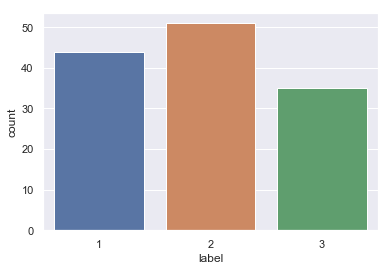

In [97]:
#printing number of wines per type
#no relevant difference between number of samples for each label
sns.countplot(df['label'])
df.groupby('label').size()

C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


['alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline']


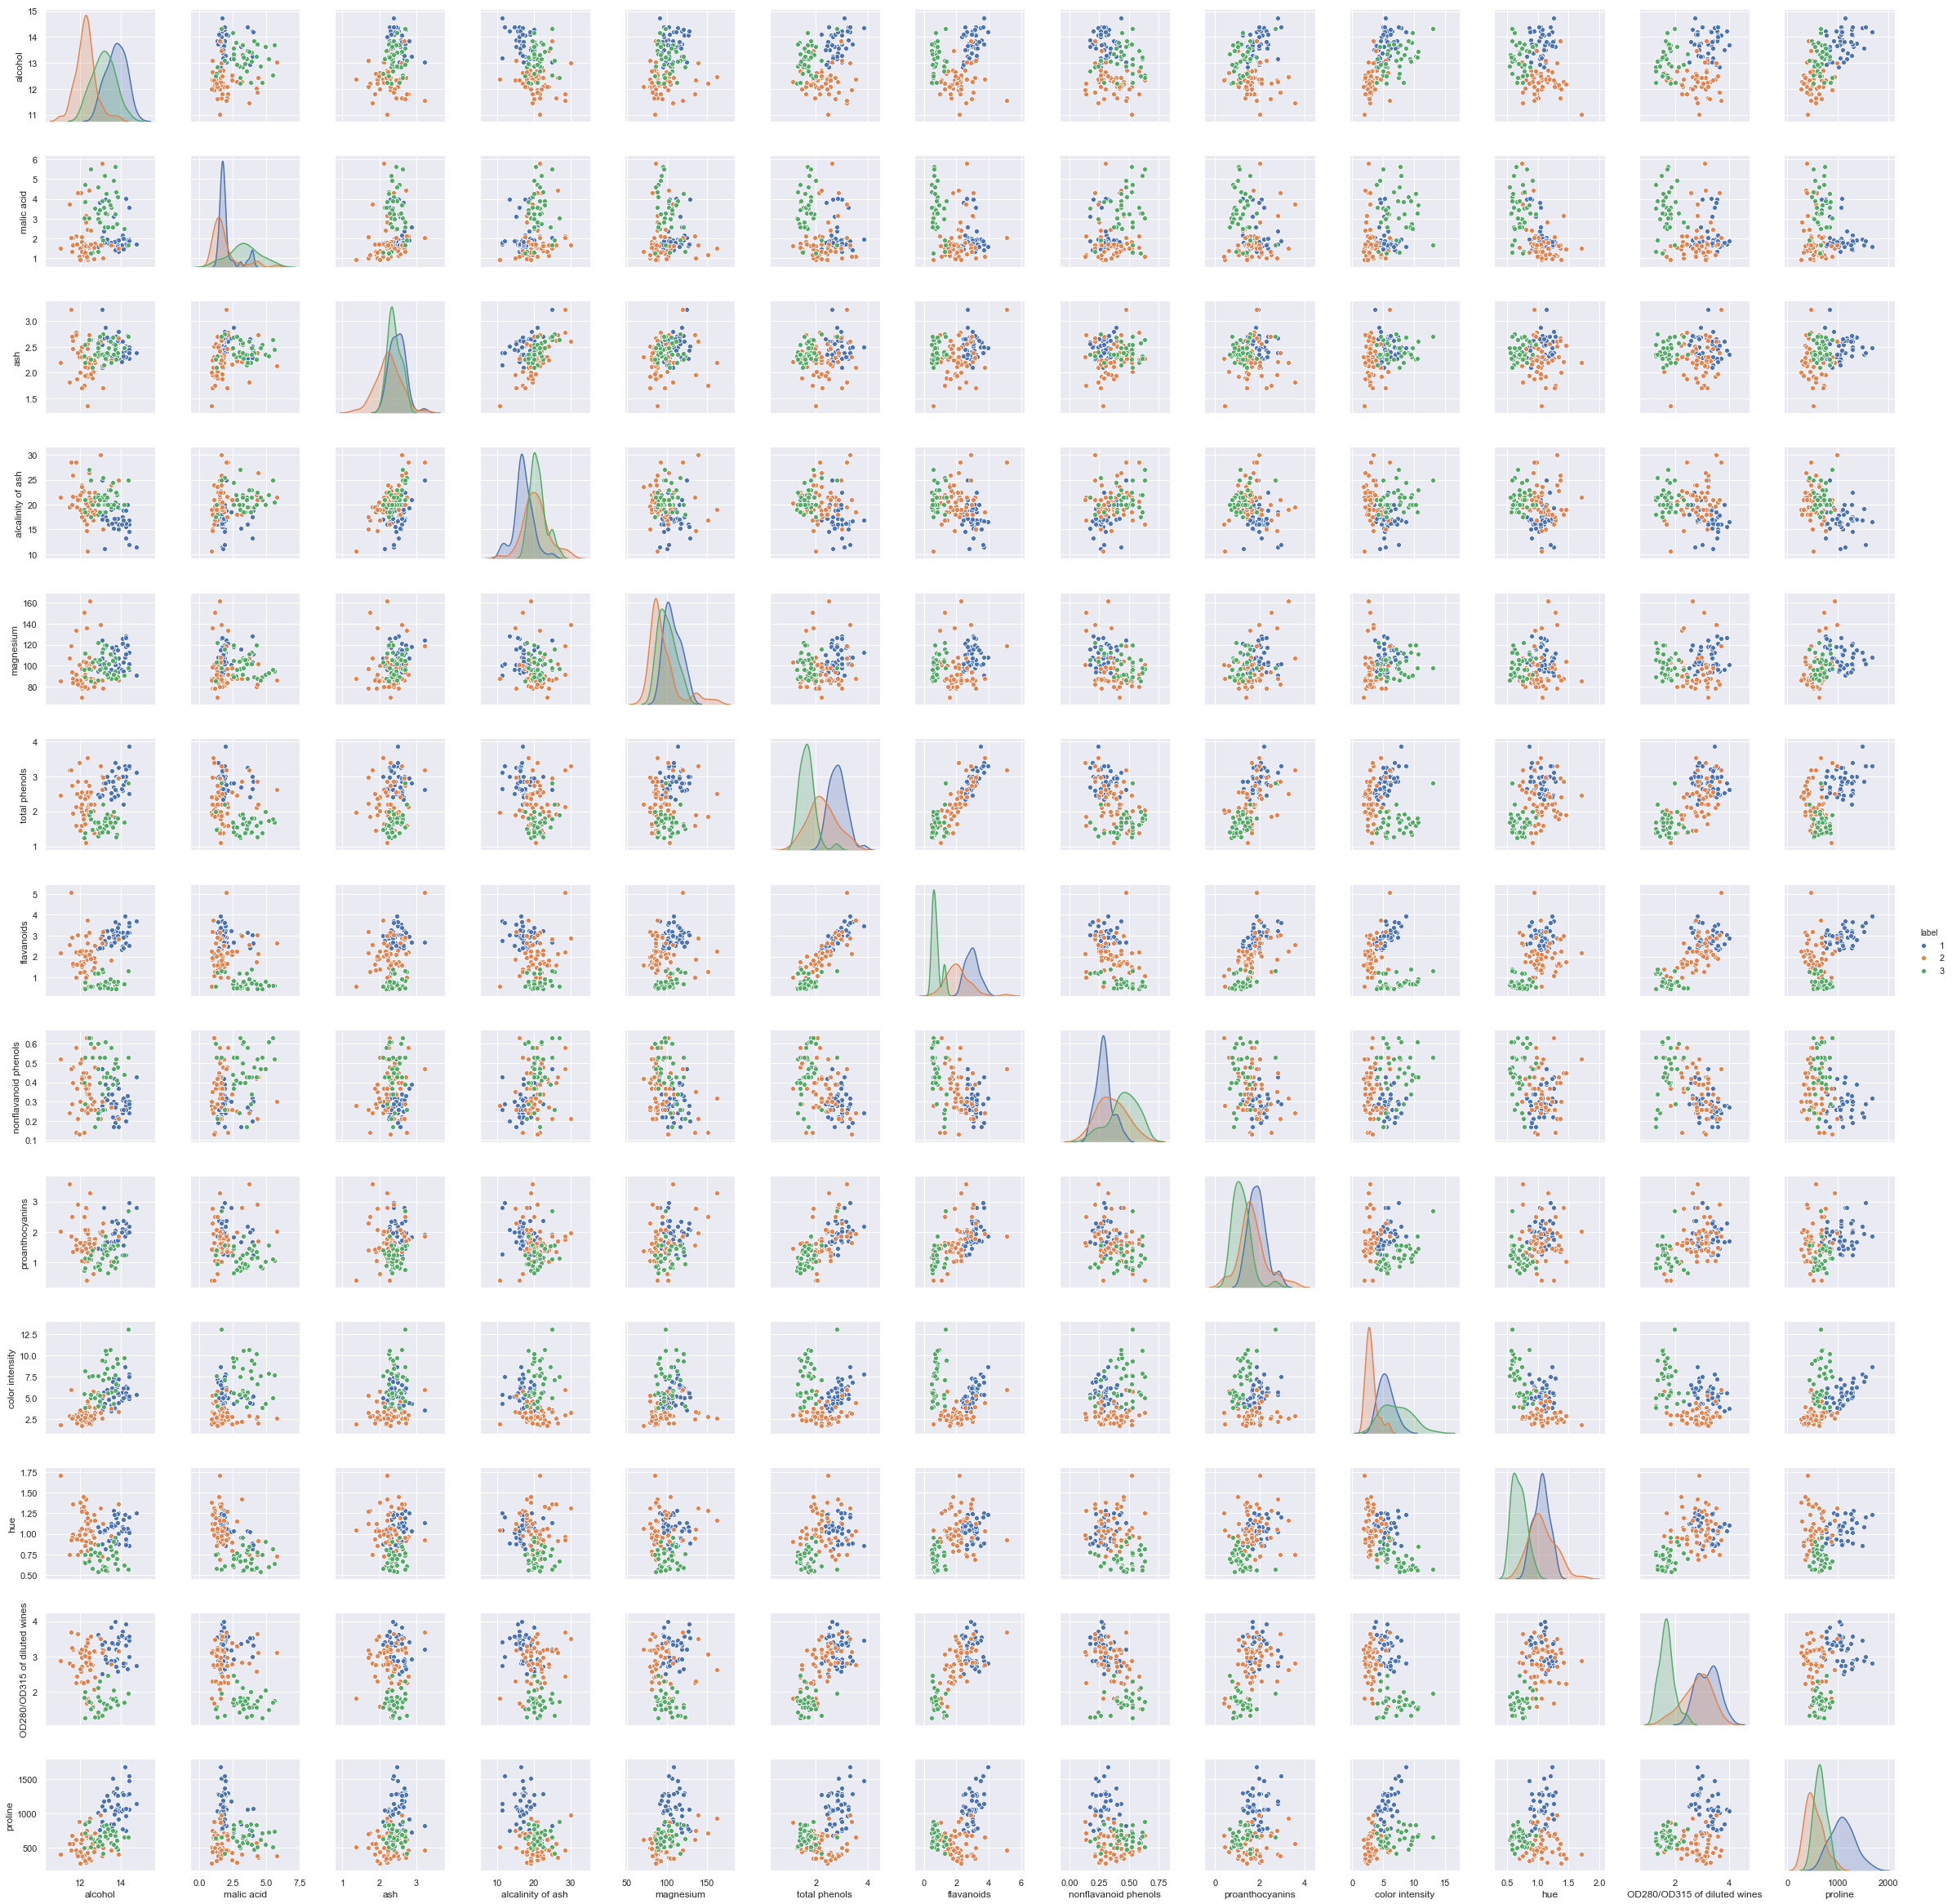

In [98]:
#creating a pairplot in seaborn for all the features
columns_features = list(df.columns)
columns_features.remove('label')
print(sns.pairplot(df, hue='label', vars=columns_features))
print (columns_features)

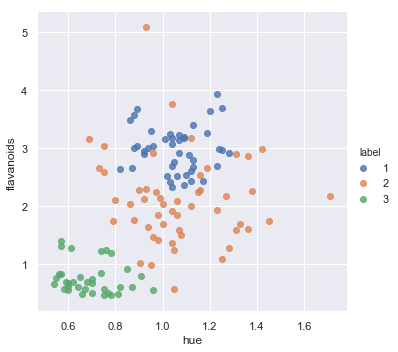

In [99]:
sns.lmplot(x='hue', y='flavanoids', hue='label', data=df, fit_reg=False)
#good feature for label 3

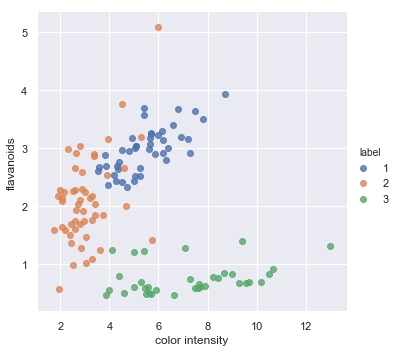

In [100]:
sns.lmplot(x='color intensity', y='flavanoids', hue='label', data=df, fit_reg=False)
#yet another good feature for label 3

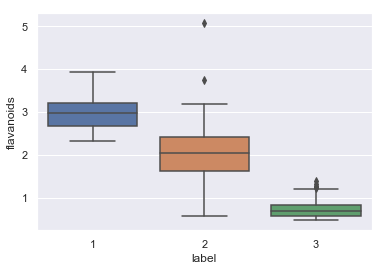

In [101]:
sns.boxplot(x=df['label'], y=df['flavanoids'])
#this feature allows us to separate label 1 from 3

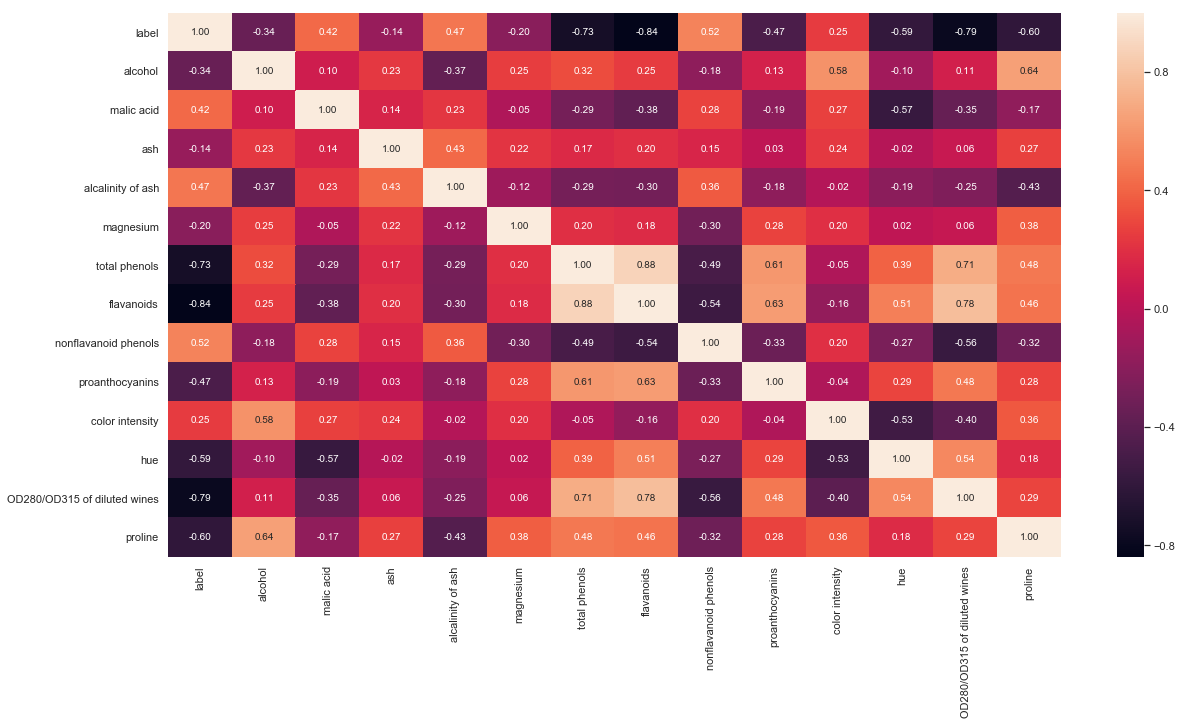

In [102]:
#checking how strong relations are between features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [103]:
#function to show overfitting or underfitting

def overfitting_underfitting_plot(model, X, y, title, size=(10,6)):

    plt.figure(figsize=size)


    plt.xlabel("training examples")
    plt.ylabel("score")
    plt.title(title)
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()


    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="cross-validation score")
    plt.legend(loc="best")
    plt.yticks(sorted(set(np.append(train_scores_mean, test_scores_mean))))
    print('cross-validation [cv=5] score: ',test_scores_mean[-1])

In [ ]:
#testing KNN without transforming data
#splitting our test data into train and test
#creating random_seed
np.random.seed(35)
X_train, X_test, y_train, y_test = train_test_split(wineTrainX, wineTrainY, random_state=0)

#Testing KNN = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print(knn.predict(X_test))
accuracy = knn.score(X_test, y_test)
print ('accuracy in KNN 3 train: ', knn.score(X_train,y_train))
print ('accuracy in KNN 3 test: ', accuracy)


#Testing KNN = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(prediction)
accuracy = knn.score(X_test, y_test)
print ('accuracy in KNN 5 train: ', knn.score(X_train,y_train))
print ('accuracy in KNN 5 test: ', accuracy)


print(metrics.classification_report(y_true=y_test, y_pred=prediction))
overfitting_underfitting_plot(knn, X_train, y_train, 'KNN = 5 without transformation')




In [139]:
#transforming the data with Box-Cox
wineTrainX_transformed = power_transform(wineTrainX, method='box-cox')
wineTestX_transformed = power_transform(wineTestX, method='box-cox')
#trying fisher's score again
#alcohol, flavanoids, color intensity, OD280/OD315 and Proline now have the highest indexes
print(df.columns)
print(fisher_index_calc(wineTrainX_transformed,wineTrainY_2dim))

#removing 'total phenols' for testing
wineTrainX_transformed2 = np.delete(wineTrainX_transformed,5,1)
wineTestX_transformed2 = np.delete(wineTestX_transformed,5,1)
print(wineTestX_transformed2.shape)
print(wineTrainX_transformed2.shape)

#change this part for wineTrainX_transformed for full features or wineTrainX_transformed2 for 'total phenols' removed
X_train, X_test, y_train, y_test = train_test_split(wineTrainX_transformed, wineTrainY, random_state=0)

Index(['label', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash',
       'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols',
       'proanthocyanins', 'color intensity', 'hue',
       'OD280/OD315 of diluted wines', 'proline'],
      dtype='object')
[81.51607028 41.29544136 18.10930692 35.09935231 24.65374271 71.04270701
 96.9697525  32.27440118 34.11777852 83.03885472 70.45394388 86.4266723
 82.42962531]
(48, 12)
(130, 12)


In [ ]:
#testing KNN with transformed data
#Testing KNN = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print(knn.predict(X_test))
accuracy = knn.score(X_test, y_test)
print (accuracy)

#Testing KNN = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print(knn.predict(X_test))
accuracy = knn.score(X_test, y_test)
print (accuracy)
overfitting_underfitting_plot(knn, X_train, y_train, 'KNN = 3')

#Testing KNN = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(knn.predict(X_test))
accuracy = knn.score(X_test, y_test)
print (accuracy)
overfitting_underfitting_plot(knn, X_train, y_train, 'KNN = 5')

In [ ]:
#testing Gaussian Naive Bayes with transformed data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
overfitting_underfitting_plot(gnb, X_train, y_train, 'Gaussian NB', size=(10,8))

In [ ]:
#trying Logistic Regression classifier with transformed data
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
#for ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

pred = logreg.predict(X_test)
print(pred)

overfitting_underfitting_plot(logreg, X_train, y_train, 'Logistic Regression')




In [ ]:
#trying MLP with transformed data and 1 hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(9),max_iter=800)
mlp.fit(X_train,y_train)
#predicting in the fitted model and printing confusion matrix and normalized data
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

overfitting_underfitting_plot(mlp, X_train, y_train, 'MLP (9)')


In [ ]:
#trying MLP with 2~3 layers on normalized data, each one consisting of the number of features
mlp = MLPClassifier(hidden_layer_sizes=(9,7),max_iter=800)
mlp.fit(X_train,y_train)

#predicting in the fitted model and printing confusion matrix and normalized data
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

overfitting_underfitting_plot(mlp, X_train, y_train, 'MLP (9,7) with total phenols')




                              score for each feature
malic acid                                  0.015673
nonflavanoid phenols                        0.015755
proanthocyanins                             0.017008
ash                                         0.020471
alcalinity of ash                           0.034174
magnesium                                   0.038705
total phenols                               0.052154
OD280/OD315 of diluted wines                0.100481
hue                                         0.124438
alcohol                                     0.133357
color intensity                             0.143686
proline                                     0.149092
flavanoids                                  0.155006


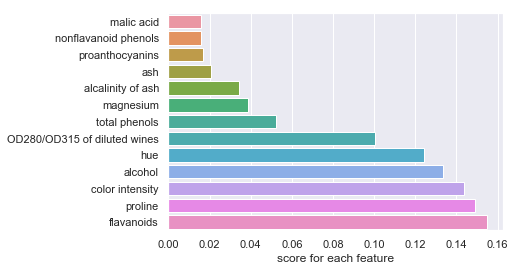

In [105]:
#checking feature importance in Random Forest technique
model_ratings = RandomForestClassifier(n_estimators=800).fit(X_train, y_train).feature_importances_
feature_scores = pd.DataFrame({'score for each feature':model_ratings}, index=list(df.columns[1:])).sort_values('score for each feature')
print(feature_scores)
sns.barplot(feature_scores['score for each feature'], feature_scores.index)

In [142]:
model = Pipeline(
    [
        ('select', SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold=0.06)),
        ('knn', KNeighborsClassifier(n_neighbors=3))
    ]
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('training set score:', model.score(X_train, y_train))
print('test set score:', model.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))
overfitting_underfitting_plot(model,X_train,y_train,'knn 5 with random forest feature selection')

(48, 13)
training set score: 0.979381443298969
test set score: 0.9696969696969697


ValueError: Found input variables with inconsistent numbers of samples: [33, 48]

In [ ]:
#testing Gaussian Naive Bayes with transformed data and feature selection
#good improvement

model = Pipeline(
    [
        ('select', SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold=0.08)),
        ('gnb', GaussianNB())
    ]
)
model.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
overfitting_underfitting_plot(model, X_train, y_train, 'Gaussian NB with feature selection')

In [ ]:
#trying logistic regression with transformed data and feature selection

model = Pipeline(
    [
        ('select', SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold=0.06)),
        ('logreg', LogisticRegression(solver='lbfgs', multi_class='auto'))
    ]
)

model.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

overfitting_underfitting_plot(model, X_train, y_train, 'Logistic Regression with feature selection')


[2 2 3 2 3 1 2 1 2 2 3 1 3 2 3 2 1 2 3 2 1 1 1 1 2 3 2 3 2 3 3 1 1]
training set score: 0.9896907216494846
test set score: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

cross-validation [cv=5] score:  0.97


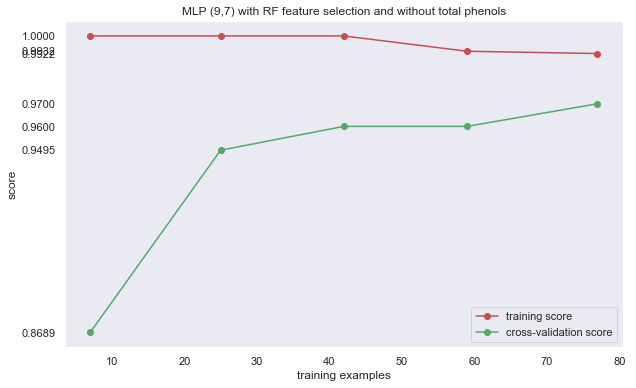

In [134]:
#trying MLP with feature selection
#change hidden_layer_sizes for different outputs
model = Pipeline(
    [
        ('select', SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold=0.06)),
        ('mlp', MLPClassifier(hidden_layer_sizes=(9,7),max_iter=1000))      
    ]
)

model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred)
print('training set score:', model.score(X_train, y_train))
print('test set score:', model.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))
overfitting_underfitting_plot(model,X_train,y_train,'MLP (9,7) with RF feature selection and without total phenols')

In [148]:
#trying KNN=3 winner algorithm

model = Pipeline(
    [
        ('select', SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold=0.06)),
        ('knn', KNeighborsClassifier(n_neighbors=3))
    ]
)
model.fit(X_train, y_train)
pred = model.predict(wineTestX_transformed)
print(pred)



[1 1 1 2 2 2 3 3 3 2 3 2 3 2 1 3 2 1 2 2 1 1 3 1 3 1 1 3 2 2 1 2 2 3 3 2 1
 3 1 3 1 3 2 3 2 1 1 2]


In [155]:
#trying KNN=5 winner algorithm

#transforming wineTestX
wineTestX = wine_mat['wineTestX']
wineTestX = wineTestX.T
wineTestX_transformed = power_transform(wineTestX, method='box-cox')
#removing 'total phenols' 
wineTrainX_transformed2 = np.delete(wineTrainX_transformed,5,1)
wineTestX_transformed2 = np.delete(wineTestX_transformed,5,1)
#change this part for wineTrainX_transformed for full features or wineTrainX_transformed2 for 'total phenols' removed
X_train, X_test, y_train, y_test = train_test_split(wineTrainX_transformed2, wineTrainY, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(knn.predict(wineTestX_transformed2))

[1 1 1 2 2 2 3 3 3 1 3 2 3 2 1 3 2 1 2 2 1 1 3 1 3 1 1 3 2 2 1 2 2 3 3 2 1
 2 1 3 1 3 2 3 2 2 1 2]


In [156]:
#trying Logistic Regression winner algorithm
#transforming wineTestX
wineTestX = wine_mat['wineTestX']
wineTestX = wineTestX.T
wineTestX_transformed = power_transform(wineTestX, method='box-cox')
#removing 'total phenols' 
wineTrainX_transformed2 = np.delete(wineTrainX_transformed,5,1)
wineTestX_transformed2 = np.delete(wineTestX_transformed,5,1)
#change this part for wineTrainX_transformed for full features or wineTrainX_transformed2 for 'total phenols' removed
X_train, X_test, y_train, y_test = train_test_split(wineTrainX_transformed2, wineTrainY, random_state=0)

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
#for ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution
logreg.fit(X_train, y_train)
pred = logreg.predict(wineTestX_transformed2)
print(pred)



[1 1 1 2 2 2 3 3 3 2 3 2 3 2 1 3 2 1 2 2 1 1 3 1 3 1 1 3 2 1 1 2 2 3 3 2 1
 2 1 3 1 3 2 3 2 2 1 2]


In [158]:
#trying MLP winner
#transforming wineTestX
wineTestX = wine_mat['wineTestX']
wineTestX = wineTestX.T
wineTestX_transformed = power_transform(wineTestX, method='box-cox')
X_train, X_test, y_train, y_test = train_test_split(wineTrainX_transformed, wineTrainY, random_state=0)

model = Pipeline(
    [
        ('select', SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold=0.06)),
        ('mlp', MLPClassifier(hidden_layer_sizes=(9),max_iter=1000))      
    ]
)

model.fit(X_train, y_train)
pred = model.predict(wineTestX_transformed)
print(pred)

[1 1 1 2 2 2 3 3 3 2 3 2 3 2 1 3 2 1 2 2 1 1 3 1 3 1 1 3 2 1 1 2 2 3 3 2 1
 3 1 3 1 3 2 3 2 1 1 2]
